# Roll_No          :   19I-1750
# Name              :   Fateh Muhammad
# Section           :   AI-J (lab)
# Assessment   :   Lab_Exam

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from skimage.io import imread, imshow
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
from sklearn.tree import DecisionTreeClassifier
from skimage.transform import resize
from sklearn.metrics import accuracy_score
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Xtr = np.loadtxt("TrainData.csv")
Ytr=np.loadtxt("TrainLabels.csv")
Xts=np.loadtxt("TestData.csv")

In [3]:
image = imread('fatehmuhammad.jpeg')
resized_image = resize(image, (128,64))

In [4]:
fd, hog_image = hog(resized_image, orientations=9, pixels_per_cell=(8,8),
                    cells_per_block=(2,2), visualize=True, multichannel=True)

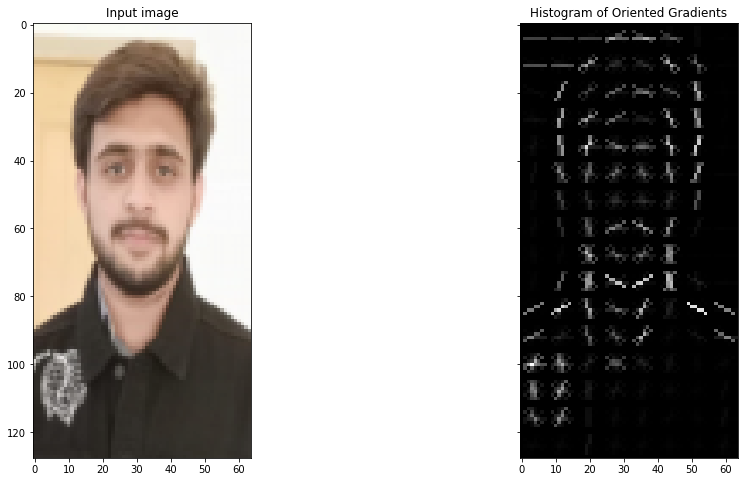

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(resized_image, cmap=plt.cm.gray) 
ax1.set_title('Input image')

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

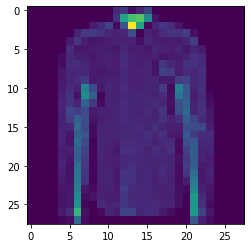

In [6]:
plt.imshow(Xtr[2650].reshape([28,28]))

In [7]:
new_pic = (Xtr[2610].reshape([28,28]))

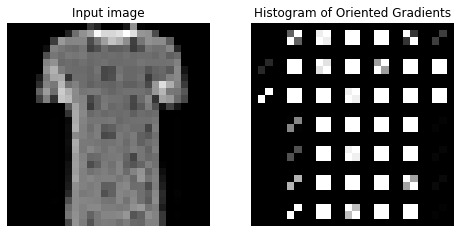

In [8]:
fd1, hog_image1 = hog(new_pic, orientations=8, pixels_per_cell=(4,4),
                    cells_per_block=(1,1), visualize=True, multichannel=None)

fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True) 

ax1.axis('off')
ax1.imshow(new_pic, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled1 = exposure.rescale_intensity(hog_image1, in_range=(0, 10)) 

ax2.axis('off')
ax2.imshow(hog_image_rescaled1, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

In [9]:
features_list=[]
final_list=[]
for element in Xtr:
    resized_pic = element.reshape((28,28))
    fd2, hog_image2 = hog(resized_pic, orientations=8, pixels_per_cell=(4,4),
                    cells_per_block=(1,1), visualize=True, multichannel=None)
    hog_image_rescaled2 = exposure.rescale_intensity(hog_image2, in_range=(0, 10))
    features_list.append(fd2)
final_list=np.array(features_list)

In [10]:
X_train, X_test, y_train, y_test = train_test_split( final_list, np.array(Ytr), test_size=0.20, train_size=0.80)

In [11]:
model.fit(X_train, y_train)
guassian_model = model.predict(X_test)

In [12]:
tree_Model = DecisionTreeClassifier()
tree_Model.fit(X_train,y_train)
tree_prediction = tree_Model.predict(X_test)

In [13]:
svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(X_train, y_train)
svmPredictions = svm.predict(X_test)

In [14]:
np.savetxt("19I_1750_FatehMuhammad.csv", svmPredictions, delimiter="\n")

In [15]:
print(accuracy_score(y_test, guassian_model)) # using DecisionTreeClassifier
print(accuracy_score(y_test, tree_prediction)) # using GaussianNB
print(accuracy_score(y_test, svmPredictions)) # using SVC classifier

0.7533333333333333
0.69
0.7958333333333333
